In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from win10toast import ToastNotifier
import ssl
from bs4 import BeautifulSoup 
from datetime import datetime
from datetime import date, timedelta
import requests


Project Write Up: In this project, I have extracted 10 datasets of Yahoo Finance's the top 25 ETF's on the stock market. In this project, I will be analyzing trends that have occured within these ETF's in the last 6 months. Additionally, whenever there is a significant jump or drop, I will be researching the date to see what factors affect trading prices.

In [2]:
AGG = pd.read_csv('AGG.csv', encoding='latin1')
IVV = pd.read_csv('IVV.csv', encoding='latin1')
QQQ = pd.read_csv('QQQ.csv', encoding='latin1')
RSP = pd.read_csv('RSP.csv', encoding='latin1')
SCHD = pd.read_csv('SCHD.csv', encoding='latin1')
SPY = pd.read_csv('SPY.csv', encoding='latin1')
VO = pd.read_csv('VO.csv', encoding='latin1')
VOO = pd.read_csv('VOO.csv', encoding='latin1')
VTI = pd.read_csv('VTI.csv', encoding='latin1')
XLK = pd.read_csv('XLK.csv', encoding='latin1')


In [3]:
symbols = [ IVV, QQQ, RSP, SPY, VO, VOO, VTI, XLK]
symbol = [ 'IVV', 'QQQ', 'RSP', 'SPY', 'VO', 'VOO', 'VTI', 'XLK']

SPY.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj. Close', 'Change',
       'Volume'],
      dtype='object')

Cleaning Process: Drop all null rows.

In [4]:
for x in range(len(symbols)):
    symbols[x].dropna(inplace=True)



In [20]:

#data = { 
  #  'Date': ['Dec 19, 2024'],
  #  'Open': ['543.69'],
   # 'High': ['545.10'],
   # 'Low': ['538.65'],
   # 'Close': ['538.9'],
   # 'Adj. Close': ['538.94'],
   # 'Change': ['-0.04%'],
  #  'Volume': ['16,792,125']}
#df = pd.DataFrame(data)
global symbols
def deleteCharacter(text, days):
    x = 42
    y = 99
    z = 99 - 42
    #add 
    short_date = 6
    negative = 43
    dd_vol = 50
    y = y + days*z
    x = x + days*z
    add = '0.00%'
    if text[x:y][1] not in ['J', 'F', 'M', 'A', 'S', 'O', 'N', 'D'] :
        while text[x + 1] not in ['J', 'F', 'M', 'A', 'S', 'O', 'N', 'D']:
            x = x + 1
            y = y + 1
    if text[x:y][short_date] == ',':
        y = y + 1
        dd_vol = dd_vol + 1
        negative = negative + 1
    if text[x:y][negative] == '-':
        #if 
        if text[x:y][negative + 2] != '.':
            dd_vol = dd_vol - 4
            y = y - 4
            
        else:
            y = y + 1
            dd_vol = dd_vol + 1
    if text[x:y][dd_vol] == ',':
        y = y + 1
    
    #selects appropriate amount of characters

    text = text[x:y]
    if len(text) == 53:
        first = text[0:negative]
        last = text[negative+1:53]
        text = first + add + last
    return text

def updateData(symbol):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'}
    url = f'https://stockanalysis.com/etf/{symbol}/history/'
    
    r = requests.get(url)

    soup = BeautifulSoup(r.text, 'html.parser')
    
    price = soup.find('table', {'class': 'svelte-2d4szo'}).text
    change = soup.find('span', {'class': 'rg'}).text
    return price
        
def isWeekday(date):
    #helper function, returns true if weekday, returns false if weekend
    formated = date.strftime('%b %d, %Y')
    date_object = datetime.strptime(formated, '%b %d, %Y')
    day_week = date_object.strftime("%A")
    if (day_week == 'Sunday') or (day_week == 'Saturday'):
        return False
    else:
        return True

def updateDataSet(symbol, starting_date, etf):
    #declare global variable to access
    today = datetime.now().date()
    days = (today - starting_date).days 
    print(symbol)
    while starting_date <= today:
        if (isWeekday(starting_date)):
            uncleanedData = updateData(symbol)
            select = deleteCharacter(uncleanedData, days)
            short_date = 6
            negative = 43
            dd_vol = 50
            x1 = 0
            x2 = 13
            x3 = 19
            x4 = 25
            x5 = 31
            x6 = 37
            x7 = 43
            x8 = 48
            x9 = 57
            if select[short_date] == ',':
                dd_vol = dd_vol + 1
                negative = negative + 1
                x2 = x2 + 1
                x3 = x3 + 1
                x4 = x4 + 1
                x5 = x5 + 1
                x6 = x6 + 1
                x7 = x7 + 1
            if select[negative] == '-':
                dd_vol = dd_vol + 1
                x8 = x8 + 1
                x9 = x9 + 1
            if select[dd_vol] == ',':
                x9 = x9 + 1
            #df.loc[-1] = [select[0:12], select[12:18], select[18:24], select[24:30], select[30:36], select[36:42], select[42:47], select[47:56]]
            if select[x1:x2] == today:
                break
            else: 
                new_df = pd.DataFrame({'Date': select[x1:x2], 'Open': select[x2:x3], 'High': select[x3:x4], 'Low': select[x4:x5], 'Close': select[x5:x6],'Adj. Close': select[x6:x7],
                'Change': select[x7:x8], 'Volume': select[x8:x9]}, index = [0])
            
            etf = pd.concat([new_df, VOO[:]]).reset_index(drop = True)
            

        else:
            pass
        days = days -1 
        starting_date = starting_date + timedelta(days=1)
        etf = etf.drop_duplicates()


In [21]:
#calls to update csv files
global symbol
global symbols




x = 0
#while x < len(symbols):
    
Data = updateData(symbol[7])
today = datetime.now().date()
starting_date = symbols[0]['Date'].iloc[0]
starting_date = datetime.strptime(starting_date, '%d-%b-%y').date()


for x in range(len(symbols)):
    updateDataSet(symbol[x], starting_date, symbols[x])


IVV
QQQ
RSP
SPY
VO
VOO
VTI
XLK


In [22]:

SPY['Open'] = SPY['Open'].astype(float)
SPY['Adj. Close'] = SPY['Adj. Close'].astype(float)
SPY['Change'] = ((SPY['Adj. Close'] - SPY['Open']) / SPY['Open']) * 100

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
           

In [32]:
global symbols
n = ToastNotifier()
date = ''
date1 = ''
lowest = 1000
highest = 0
x = 0

for y in range(len(symbols)):
    while x < 21:
        x += 1
        if symbols[y]['Open'].iloc[x] < lowest:
            lowest = symbols[y]['Open'].iloc[x]
            date = symbols[y]['Date'].iloc[x]
        if SPY['Open'].iloc[x] > highest:
            highest = symbols[y]['Open'].iloc[x]
            date1 = symbols[y]['Date'].iloc[x]

    if symbols[y]['Open'].iloc[0] == lowest:
        n.show_toast(f"{symbols[y]} Open: ${lowest}", f"Lowest Open in the past 1 month; High: ${highest}", duration = 5)

    if symbols[y]['Open'].iloc[0] == highest:
        n.show_toast(f"{symbols[y]} Open: ${highest}", f"Highest Open in the past 1 month; Low: ${lowest}", duration = 5)


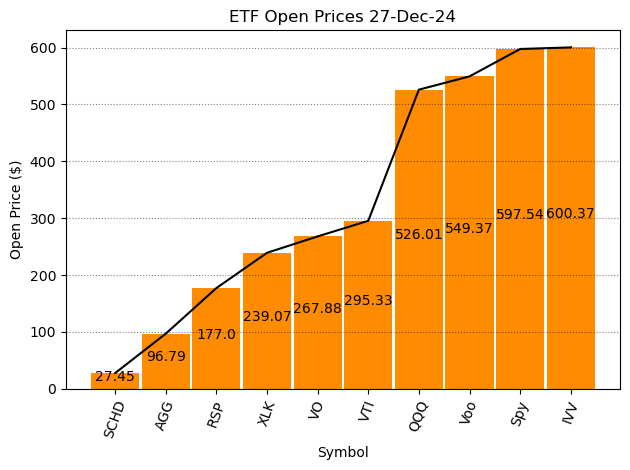

In [33]:
S1 = float(SPY['Open'].iloc[0])
S2 = float(SCHD['Open'].iloc[0])
A1 = float(AGG['Open'].iloc[0])
I1 = float(IVV['Open'].iloc[0])
R1 = float(RSP['Open'].iloc[0])
V1 = float(VO['Open'].iloc[0])
V2 = float(VOO['Open'].iloc[0])
V3 = float(VTI['Open'].iloc[0])
Q1 = float(QQQ['Open'].iloc[0])
X1 = float(XLK['Open'].iloc[0])

Names = ['SCHD', 'AGG', 'RSP', 'XLK', 'VO','VTI','QQQ', 'Voo','Spy','IVV']

Stocks = [S2, A1, R1, X1, V1, V3, Q1, V2, S1, I1]

plt.bar(Names, Stocks, color = 'darkorange', linestyle ='dashed', width=.95)
addlabels(Names, Stocks)
plt.plot(Names, Stocks, color='black', marker=',', label='Line Data')
plt.xticks(rotation=70)
plt.title(f'ETF Open Prices {SPY['Date'].iloc[0]}')
plt.ylabel('Open Price ($)')
plt.xlabel('Symbol')
plt.grid(axis='y', color = 'black', linestyle=':', alpha=0.5, zorder=0)
plt.tight_layout()
plt.show()

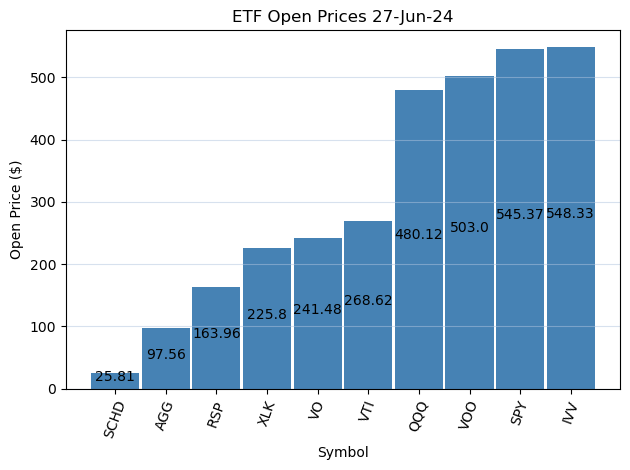

In [36]:
# Extracting data
S1 = float(SPY['Open'].iloc[127])
S2 = float(SCHD['Open'].iloc[127])
A1 = float(AGG['Open'].iloc[127])
I1 = float(IVV['Open'].iloc[127])
R1 = float(RSP['Open'].iloc[127])
V1 = float(VO['Open'].iloc[127])
V2 = float(VOO['Open'].iloc[127])
V3 = float(VTI['Open'].iloc[127])
Q1 = float(QQQ['Open'].iloc[127])
X1 = float(XLK['Open'].iloc[127])

# Names and Stocks lists
Names = ['SCHD', 'AGG', 'RSP', 'XLK', 'VO', 'VTI', 'QQQ', 'VOO', 'SPY', 'IVV']
Stocks = [S2, A1, R1, X1, V1, V3, Q1, V2, S1, I1]

# Plotting
plt.bar(Names, Stocks, color='steelblue', width = 0.95)
addlabels(Names, Stocks)
plt.grid(axis= 'y', alpha = 0.5, color = 'lightsteelblue')
plt.xticks(rotation=70)
plt.title(f'ETF Open Prices {SPY['Date'].iloc[127]}')
plt.xlabel('Symbol')
plt.ylabel('Open Price ($)')

plt.tight_layout()  # Prevent clipping of labels
plt.show()


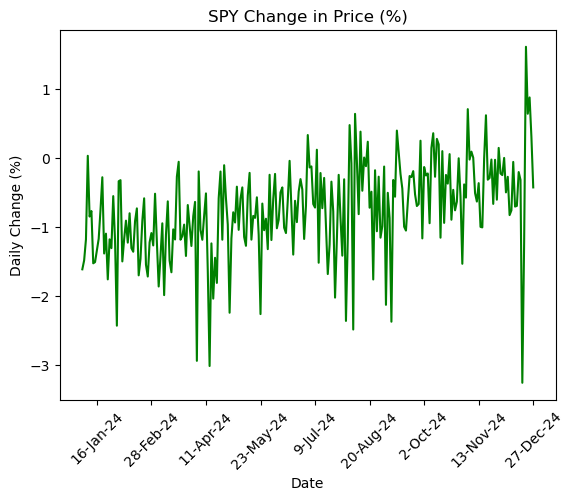

In [48]:
fig, ax = plt.subplots()
ax.set_title('SPY Change in Price (%)')
ax.plot(SPY['Date'], SPY['Change'], color='g')

ax.set_xticks([SPY['Date'].iloc[0], SPY['Date'].iloc[30], SPY['Date'].iloc[60], SPY['Date'].iloc[90], SPY['Date'].iloc[120], SPY['Date'].iloc[150], SPY['Date'].iloc[180], SPY['Date'].iloc[210], SPY['Date'].iloc[240]])
plt.xticks(rotation = 45)
ax.set_xlabel('Date')
plt.gca().invert_xaxis()
ax.set_ylabel('Daily Change (%)')

plt.show()
